In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("data/solidYellowLeft.jpg")
img  = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'img')

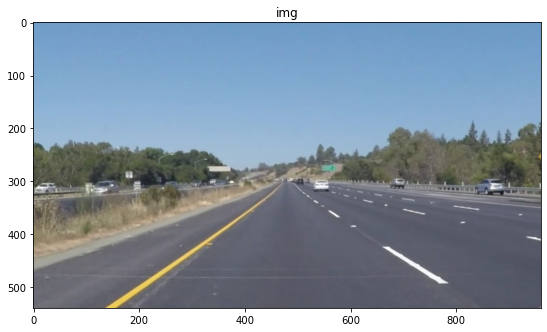

In [3]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("img")